1. Məlumatların Təşkili və Əsaslandırma:
Nə edir: Bu hissə bir Python dictionary yaradır və içərisindəki məlumatları (məkan, sahə, qiymət) qruplaşdırır. Əlavə olaraq, mekan və sahe məlumatları x-ə, qiymet isə y-ə təyin edilir.

In [ ]:
dict = {
    "mekan": ["nerimanov", "xiradalan", "old city"],
    "sahe": [140, 120, 70],
    "qiymet": [150000, 90000, 240000],
}
x = dict["mekan"], dict["sahe"]
y = dict["qiymet"]

2. Məlumatların Generasiyası: 
Nə edir: Məlumat dəsti generasiya edilir:
TV, radio, və SocialMedia (reklam büdcələri üçün) təsadüfi ədədlər yaradır.
Sales (satışlar) isə reklam büdcələrinə əsaslanan xətti tənliklə hesablanır.
Bu məlumatlar pandas DataFrame-də saxlanılır.

In [3]:
import numpy as np
import pandas as pd

np.random.seed(42)
TV = np.random.randint(50, 300, 100)
radio = np.random.randint(10, 100, 100)
sm = np.random.randint(20, 200, 100)
Sales = 5 + 0.05 * TV + 0.1 * radio + 0.07 * sm + np.random.randn(100) * 5
data = pd.DataFrame({"TV": TV, "Radio": radio, "SocialMedia": sm, "Sales": Sales})
data.head()

,TV,Radio,SocialMedia,Sales
0,152,83,140,27.299876
1,229,71,46,27.931268
2,142,23,140,25.665362
3,64,57,135,19.778243
4,156,24,22,26.068873


3. Vizual Analiz:
Nə edir: Üç fərqli qrafik yaradılır:
TV, Radio, və Sosial Media reklam büdcələrinin satışlarla əlaqəsini göstərir.

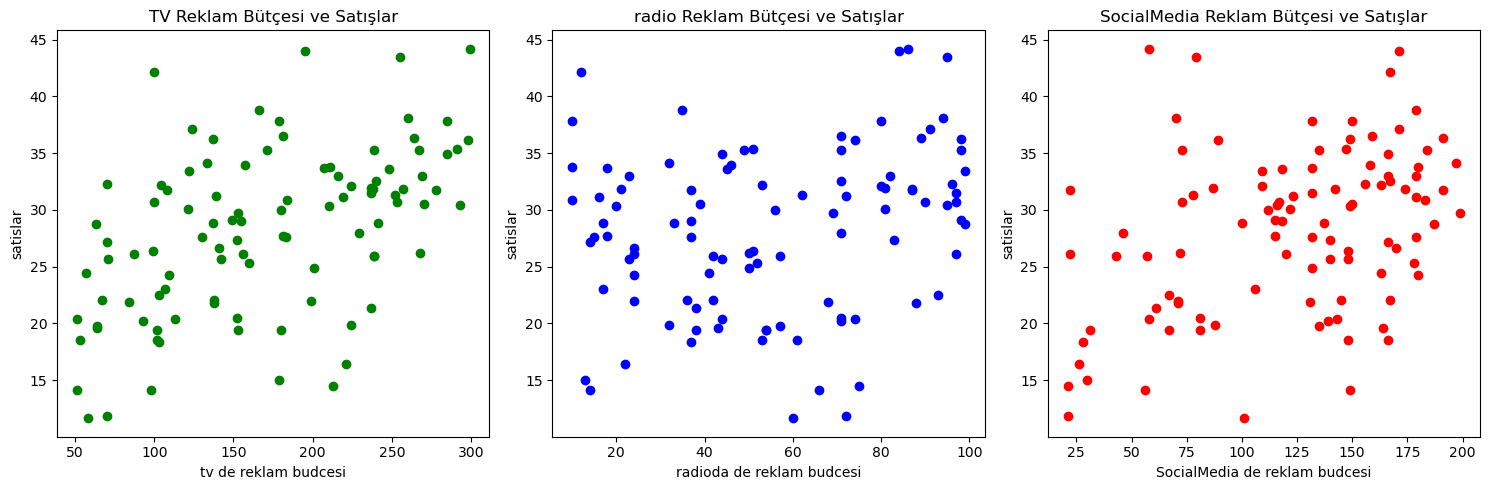

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(data["TV"], data["Sales"], color="green")
plt.xlabel("tv de reklam budcesi")
plt.ylabel("satislar")
plt.title("TV Reklam Bütçesi ve Satışlar")

plt.subplot(1, 3, 2)
plt.scatter(data["Radio"], data["Sales"], color="blue")
plt.xlabel("radioda de reklam budcesi")
plt.ylabel("satislar")
plt.title("radio Reklam Bütçesi ve Satışlar")

plt.subplot(1, 3, 3)
plt.scatter(data["SocialMedia"], data["Sales"], color="red")
plt.xlabel("SocialMedia de reklam budcesi")
plt.ylabel("satislar")
plt.title("SocialMedia Reklam Bütçesi ve Satışlar")

plt.tight_layout()
plt.show()

4. Məlumatların Təlim və Testə Bölünməsi:
Nə edir: X (müstəqil dəyişənlər) və y (hədəf dəyişəni) təlim və test dəstlərinə bölünür.

In [8]:
from sklearn.model_selection import train_test_split

X = data[["TV", "SocialMedia", "Radio"]]
y = data["Sales"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"train data:{X_train.shape}\ntest data:{X_test.shape}")

train data:(80, 3)
test data:(20, 3)


5. Model Qurulması və Qiymətləndirilməsi: 
Nə edir: Xətti Regressiya modeli qurulur:
Əmsallar (coef_) və kəsişmə nöqtəsi (intercept_) çap edilir.
Test dəsti ilə satış proqnozları yaradılır.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
print(f"Tepe:{model.coef_}\nkesishme:{model.intercept_}")
y_pred = model.predict(X_test)

Tepe:[0.0581624  0.08070388 0.06617858]
kesishme:4.50275042163592


6. Modelin Performans Analizi:
Nə edir: Modelin performansı üçün:
Orta kvadratik xəta (MSE).
Determinasiya əmsalı (R²) hesablanır.

In [10]:
com = pd.DataFrame({"Heqiqi": y_test, "praqnoz": y_pred})
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse:{mse}\nr2:{r2}")

mse:17.547971972912972
r2:0.6087255073561774


7. Proqnozlar və Vizual Analiz:
Nə edir: Əsl qiymətlərlə proqnozların müqayisəsini göstərən qrafik çəkilir.

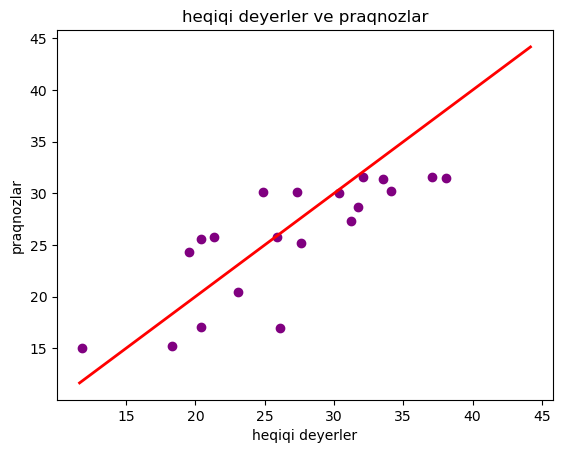

In [11]:
plt.scatter(y_test, y_pred, color="purple")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2)
plt.xlabel("heqiqi deyerler")
plt.ylabel("praqnozlar")
plt.title("heqiqi deyerler ve praqnozlar")
plt.show()

8. Yeni Proqnozlar: 
Nə edir: Yeni reklam büdcələri üçün satış proqnozu verir.

In [13]:
yeni_budce = pd.DataFrame({"TV": [200], "SocialMedia": [100], "Radio": [50]})
yeni_satis = model.predict(yeni_budce)
print(f"praqnoz:{yeni_satis[0]}")

praqnoz:27.514547744350768


Əlavə: Daha böyük büdcələr üçün proqnozlar çap edilir.

In [15]:
daha = pd.DataFrame(
    {"TV": [150, 250, 300], "SocialMedia": [90, 110, 130], "Radio": [40, 60, 80]}
)
pred = model.predict(daha)
for idx, satis in enumerate(pred):
    print(f"budce {idx+1}: {daha.iloc[idx].to_dict()}--> praqnoz:{satis:.2f}")

budce 1: {'TV': 150, 'SocialMedia': 90, 'Radio': 40}--> praqnoz:23.14
budce 2: {'TV': 250, 'SocialMedia': 110, 'Radio': 60}--> praqnoz:31.89
budce 3: {'TV': 300, 'SocialMedia': 130, 'Radio': 80}--> praqnoz:37.74
